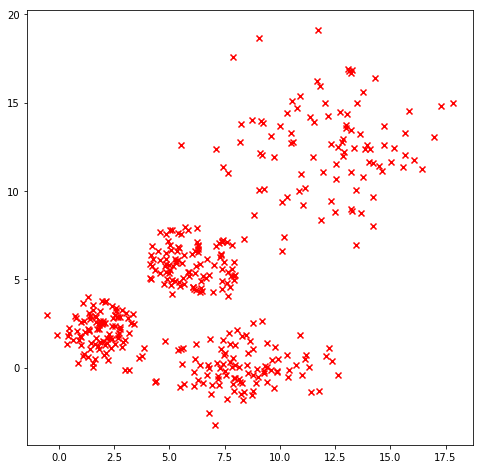

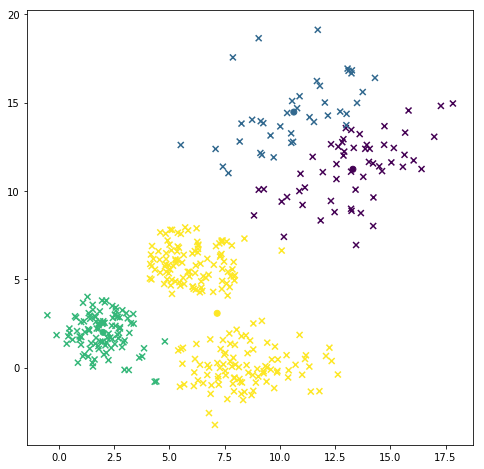

In [2]:
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = scio.loadmat('data/puncte2D.mat')
points = data['P']

plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], c='r', marker='x')

# find the centroids and labels
kmeans = KMeans(n_clusters=4, init='random', n_init=1, algorithm='full')
kmeans.fit(points)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], c=labels, marker='x')
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(0, centroids.shape[0]), marker='o')
plt.show()


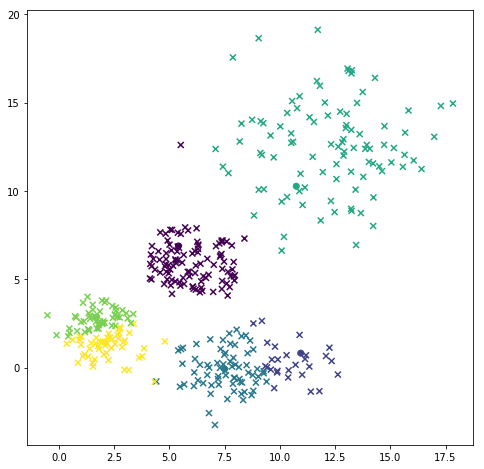

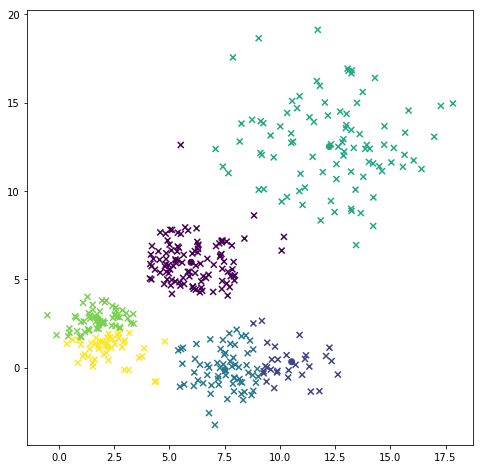

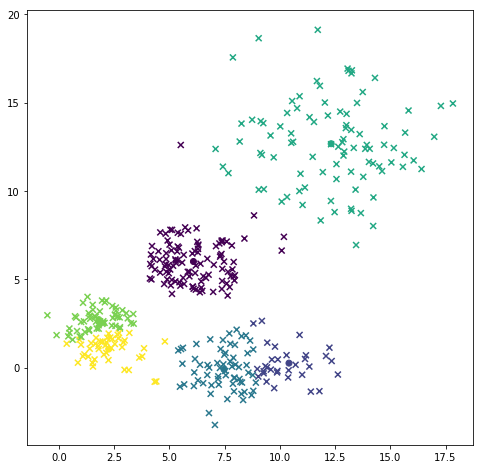

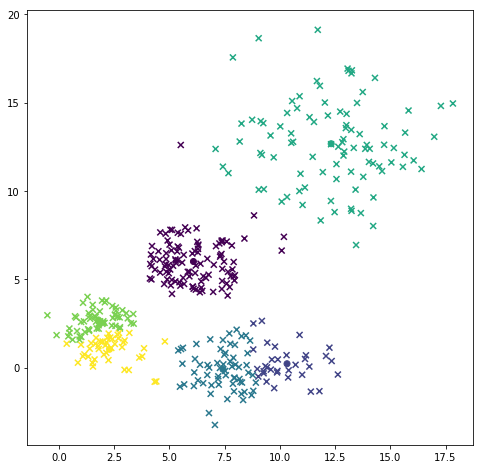

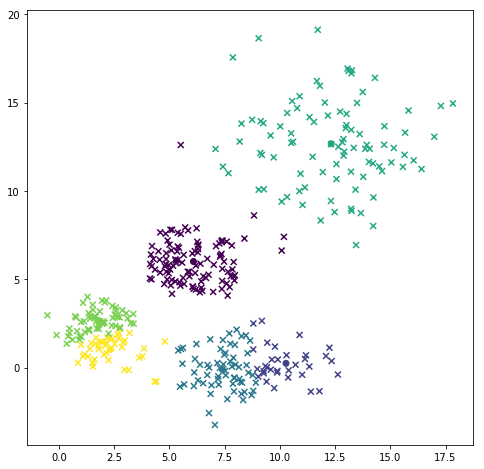

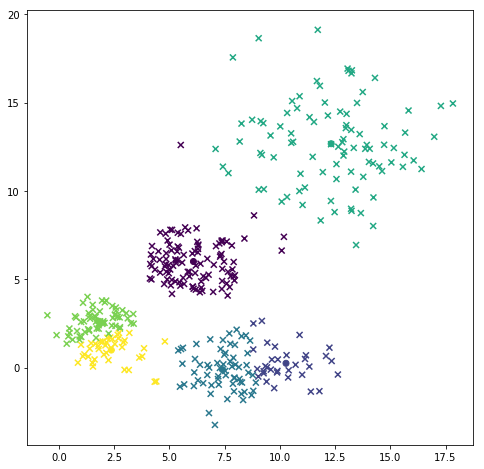

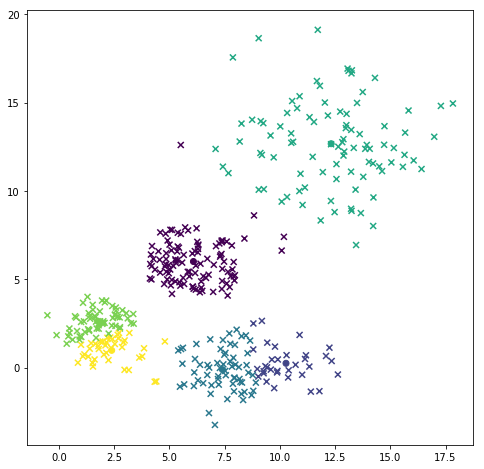

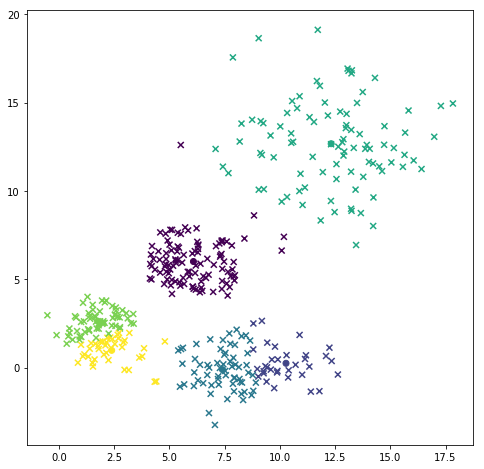

In [3]:
def plot_clusters (points, centroids, labels) : 
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], c=labels, marker='x')
    plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(0, centroids.shape[0]), marker='o')
    plt.show()

kmeans = KMeans(n_clusters=6, init='random', n_init=1, algorithm='full')

kmeans.set_params(tol=100.0)
centroid_hist = []
label_hist = []

pcentroids = None
pinertia = 0
thresh = 1e-4
while True :
    if type(pcentroids) != type(None) :
        kmeans.set_params(init=pcentroids)
        
    kmeans.fit(points)
    ccentroids = kmeans.cluster_centers_
    clabels = kmeans.labels_
    cinertia = kmeans.inertia_
    
    centroid_hist.append(ccentroids)
    label_hist.append(clabels)
    
    if abs(pinertia - cinertia) <= thresh :
        break;
    
    pcentroids = ccentroids
    pinertia = cinertia
    
centroid_hist = np.array(centroid_hist)
label_hist = np.array(label_hist)

for i in range(label_hist.shape[0]) :
    plot_clusters(points, centroid_hist[i], label_hist[i])

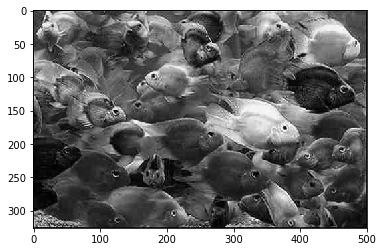

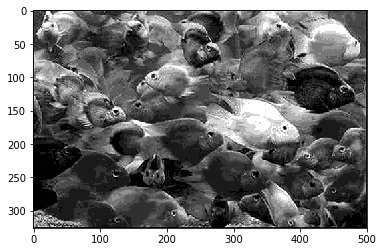

In [3]:
import skimage.io as skio
import skimage.color as skolor

im = skio.imread('data/pesti.jpg')
im_gray = skolor.rgb2gray(im)

# intensity clustering
data = im_gray.flatten()
data = np.dstack((data, np.zeros_like(data))).squeeze()
kmeans = KMeans(n_clusters=10, precompute_distances=True)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_[:,0]

# marking
for i in range(centroids.size) :
    lpoints_indices = np.argwhere(labels == i)
    data[lpoints_indices, 0] = centroids[i]
    
data = data[:, 0]
data = data.reshape(im_gray.shape)

plt.figure()
plt.imshow(im_gray, 'gray')
plt.figure()
plt.imshow(data, 'gray')
plt.show()

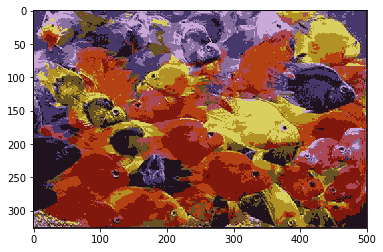

In [34]:
# color clustering
data = im.reshape(-1, 3)
kmeans = KMeans(n_clusters=10, precompute_distances=True)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_.astype(np.uint8)


# marking
for i in range(centroids.shape[0]) :
    lpoints_indices = np.argwhere(labels == i)
    data[lpoints_indices, :] = centroids[i]
    
data = data.reshape(im.shape)

plt.imshow(im)
plt.figure()
plt.imshow(data)
plt.show()

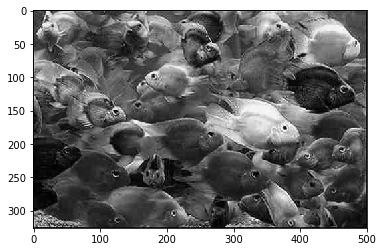

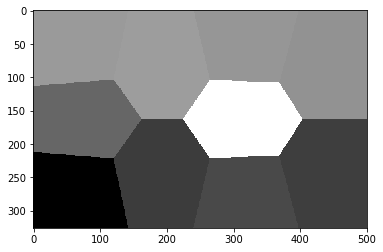

In [56]:
# intensity clustering
data = im_gray.flatten()

imh = im.shape[0]
imw = im.shape[1]
coords = np.dstack(np.mgrid[:imh,:imw]).reshape(-1, 2)

data = np.column_stack((data, coords))

kmeans = KMeans(n_clusters=10, precompute_distances=True)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_[:,0]

# marking
for i in range(centroids.shape[0]) :
    lpoints_indices = np.argwhere(labels == i)
    data[lpoints_indices, 0] = centroids[i]
    
data = data[:, 0]
data = data.reshape(im_gray.shape)

plt.figure()
plt.imshow(im_gray, 'gray')
plt.figure()
plt.imshow(data, 'gray')
plt.show()